# CNN for Image Classification

In this lab, you are given a dataset containing 6,000 pictures of cats and dogs (3,000 cats, 3,000 dogs) and asked to train a classifier built upon Convolutional Neural Networks (ConvNets) to classify images as "dogs" or "cats".

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# from __future__ import print_function
import keras
from keras import metrics
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

D:\Applications\Python3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Exercise 1 
Split the dataset by selecting 4,800 pictures for training, 600 for validation, and 600 for testing.

In [2]:
img_width = 50
img_height = 50
num_classes = 2
DATA_DIR = './data/'
image_filenames = [DATA_DIR+i for i in os.listdir(DATA_DIR)] # use this for full dataset

# Setting the random seed
np.random.seed(200)


# Split the data in three sets, 80% for training, 10% for validation and 10% for testing
# make sure that the image filenames have a fixed order before shuffling
# Add your code here

In [3]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

The function ```get_class_from_filename``` takes the file path and returns ***0*** for cats and ***1*** for dogs.

The function ```generate_class_arr``` takes the array of filenames and returns an array of class numbers using the function ```get_class_from_filename```.

In [4]:

def load_images(filenames):
    
    files = []
    for i in range(len(filenames)):
        files.append(cv2.imread(filenames[i]))
        
    return np.array(resize_files(files))


def resize_files(files):
    _files = []
    for i in range(len(files)):
        _resized = np.array(cv2.resize(files[i], (img_width, img_height),interpolation=cv2.INTER_AREA))
        _normalized = np.true_divide(_resized, 255)
        _files.append(_normalized)
        
    return _files


def get_class_from_filename(filename):
    
    parts = filename.split(".")
    size = len(parts)
    
    _class = parts[size - 3]
    _class = _class[-3:]
    
    return np.array([0, 1] if _class == "cat" else [1,0])


# print(get_class_from_filename("./test/dog.267.jpg"))

def generate_class_arr(filenames):
    
    classes = []
    
    for i in range(len(filenames)):
        classes.append(get_class_from_filename(filenames[i]))
    
    return np.array(classes)

# arr = ['./data/cat.2718.jpg', './data/dog.1753.jpg', './data/cat.1211.jpg', './data/dog.775.jpg', './data/cat.1577.jpg', './data/cat.952.jpg']
# print(generate_class_arr(arr))
        

In [5]:
y = generate_class_arr(image_filenames)

In [6]:

x_train_filenames, x_test_filenames, y_train, y_test = train_test_split(image_filenames, y, test_size=0.2)
x_test_filenames, x_val_filenames, y_test, y_val = train_test_split(x_test_filenames, y_test, test_size=0.5)


In [7]:
x_train = load_images(x_train_filenames)
x_test = load_images(x_test_filenames)
x_val = load_images(x_val_filenames)


In [8]:
# print(x_train_filenames[:5])
# print(y_train[:5])
print(len(x_train_filenames), " ", len(y_train))

# print(x_test_filenames[:5])
# print(y_test[:5])
print(len(x_test_filenames), " ", len(y_test))

# print(x_val_filenames[:5])
# print(y_val[:5])
print(len(x_val_filenames), " ", len(y_val))


4800   4800
600   600
600   600


Label: [1 0]
(50, 50, 3)


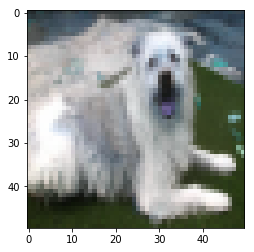

In [9]:

plt.imshow(x_train[0])
print("Label: {}".format(y_train[0]))
print(x_train[0].shape)


Label: [1 0]


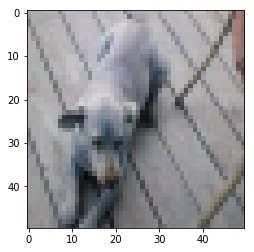

In [10]:

plt.imshow(x_test[0])
print("Label: {}".format(y_test[0]))


Label: [1 0]


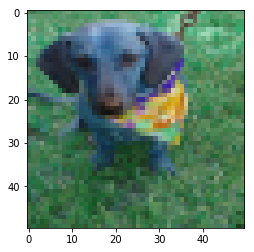

In [11]:

plt.imshow(x_val[0])
print("Label: {}".format(y_val[0]))


### Exercise 2
Train a Convolutional Neural Network (ConvNet) on the training set. The general structure of the ConvNet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers. A Conv2D layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. A MaxPooling2D layer is used to downscale input in both the vertical and horizontal dimensions.

In [12]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [13]:
# Add your code here


input_shape = x_train[1].shape

model = Sequential()
#add model layers

model.add(Conv2D(64, 2,padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, 2, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, 2, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))

model.add(Dense(2, activation='sigmoid'))
          

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 64)        832       
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 25, 25, 128)       512       
__________

In [15]:
batch_size = 128

In [16]:
epochs = 60

In [17]:
optimizer = keras.optimizers.RMSprop(lr=0.00005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [18]:
print(len(x_test))

600


In [132]:
print(len(x_train[5]))
print(x_train[5].shape)
print(type(x_train))
print(len(y_train))
print(type(y_train))
print(type(y_train[0]))
print(y_train[0].shape)

50
(50, 50, 3)
<class 'numpy.ndarray'>
4800
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(2,)


In [133]:
x_train_in = np.array(x_train[:2])
y_train_in = np.array(y_train[:2])

import sys
print(sys.version_info)

sys.version_info(major=3, minor=6, micro=1, releaselevel='final', serial=0)


In [21]:
from keras.callbacks import ModelCheckpoint

weights_filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(weights_filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode='max')
callbacks_list = [checkpoint]


In [22]:
# import os.path
# from keras.models import load_model

# def load_model_weights(filepath):
    
#     if os.path.exists(filepath):
#         model = load_model(filepath)
#         return True, model

# _model_exists, _model = load_model_weights

# if _model_exists:
#     model = _model
    

In [23]:

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_test, y_test), callbacks=callbacks_list, verbose=1)


Train on 4800 samples, validate on 600 samples
Epoch 1/60
4800/4800 [==============================] - 7s 2ms/step - loss: 0.6656 - acc: 0.6106 - val_loss: 0.6940 - val_acc: 0.5050
Epoch 2/60
4800/4800 [==============================] - 3s 718us/step - loss: 0.5996 - acc: 0.6760 - val_loss: 0.7071 - val_acc: 0.5050
Epoch 3/60
4800/4800 [==============================] - 3s 720us/step - loss: 0.5682 - acc: 0.6981 - val_loss: 0.7880 - val_acc: 0.5050
Epoch 4/60
4800/4800 [==============================] - 3s 722us/step - loss: 0.5504 - acc: 0.7154 - val_loss: 0.8407 - val_acc: 0.5050
Epoch 5/60
4800/4800 [==============================] - 3s 719us/step - loss: 0.5225 - acc: 0.7365 - val_loss: 0.8830 - val_acc: 0.5050
Epoch 6/60
4800/4800 [==============================] - 3s 720us/step - loss: 0.5270 - acc: 0.7315 - val_loss: 0.9269 - val_acc: 0.5050
Epoch 7/60
4800/4800 [==============================] - 4s 733us/step - loss: 0.4965 - acc: 0.7554 - val_loss: 0.7116 - val_acc: 0.5217
Epo

Epoch 31/60
4800/4800 [==============================] - 4s 738us/step - loss: 0.2553 - acc: 0.8896 - val_loss: 0.5133 - val_acc: 0.7700
Epoch 32/60
4800/4800 [==============================] - 4s 739us/step - loss: 0.2489 - acc: 0.8983 - val_loss: 0.5342 - val_acc: 0.7717
Epoch 33/60
4800/4800 [==============================] - 4s 736us/step - loss: 0.2496 - acc: 0.8975 - val_loss: 0.5329 - val_acc: 0.7750
Epoch 34/60
4800/4800 [==============================] - 3s 719us/step - loss: 0.2391 - acc: 0.9027 - val_loss: 0.5304 - val_acc: 0.7683
Epoch 35/60
4800/4800 [==============================] - 3s 723us/step - loss: 0.2311 - acc: 0.9054 - val_loss: 0.5671 - val_acc: 0.7400
Epoch 36/60
4800/4800 [==============================] - 3s 724us/step - loss: 0.2285 - acc: 0.9102 - val_loss: 0.5825 - val_acc: 0.7267
Epoch 37/60
4800/4800 [==============================] - 3s 725us/step - loss: 0.2126 - acc: 0.9137 - val_loss: 0.5615 - val_acc: 0.7433
Epoch 38/60
4800/4800 [==================

In [24]:

score = model.evaluate(x_val, y_val, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


600/600 [==============================] - 0s 363us/step
Test loss: 0.5754404934247335
Test accuracy: 0.785


In [81]:

model_predictions = model.predict(x_val)


In [96]:

preds = np.squeeze(model.predict(x_val))
# preds = model_predictions
threshold = 0.5
print(classification_report(y_val.argmax(axis=1), preds.argmax(axis=1)))


             precision    recall  f1-score   support

          0       0.82      0.74      0.78       303
          1       0.76      0.84      0.79       297

avg / total       0.79      0.79      0.78       600



In [83]:

print("Confusion matrix:")
print(confusion_matrix(y_val.argmax(axis=1), preds.argmax(axis=1)))


Confusion matrix:
[[223  80]
 [ 49 248]]


### Exercise 3

Output the training/validation loss and accuracy curves. Also print the classification results (e.g., classification accuracy, confusion matrix, precision-recall curves and/or ROC curves) on the test set.

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize

mod_preds = model_predictions

# Add your code here
print("Classification report for the simple CNN:")
print(classification_report(y_val.argmax(axis=1), preds.argmax(axis=1)))
print("Confusion matrix:")
print(confusion_matrix(y_val.argmax(axis=1), preds.argmax(axis=1)))



Classification report for the simple CNN:
             precision    recall  f1-score   support

          0       0.82      0.74      0.78       303
          1       0.76      0.84      0.79       297

avg / total       0.79      0.79      0.78       600

Confusion matrix:
[[223  80]
 [ 49 248]]


In [122]:
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score

def plot_precision_recall_curve(labels, predictions, classifier_name=None):
    
    title = "Precision-Recall curve"
    if classifier_name is not None:
        title = "Precision-Recall curve for {} predictions".format(classifier_name)
        
    precision, recall, thresholds = precision_recall_curve(labels, predictions)
    
    average_precision = average_precision_score(labels, predictions)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.suptitle('Precision-Recall curve for {0}: AP={1:0.2f}'.format(classifier_name, average_precision))
    
    plot = plt.subplot(1, 2, 2)
    
    plot.step(recall, precision, color='b', alpha=0.2, where='post')
    
    plot.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plot.set_xlabel('Recall')
    plot.set_ylabel('Precision')
    plot.set_ylim([0.0, 1.05])
    plot.set_xlim([0.0, 1.0])
    
    
    return plot


def first_arg(arr):
    
    _arr = []
    
    for i in range(len(arr)):
        _arr.append(arr[i][1])
    
    return _arr


In [123]:

# fpr_simple, tpr_simple, thresholds_simple = roc_curve(y_val.argmax(axis=1).ravel(), mod_preds.argmax(axis=1).ravel())
fpr_simple, tpr_simple, thresholds_simple = roc_curve(y_val.argmax(axis=1).ravel(), first_arg(preds))
auc_simple = auc(fpr_simple, tpr_simple)


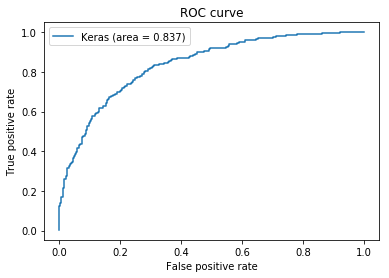

In [124]:

plt.figure(1)
# plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_simple, tpr_simple, label='Keras (area = {:.3f})'.format(auc_simple))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


Axes(0.547727,0.125;0.352273x0.755)


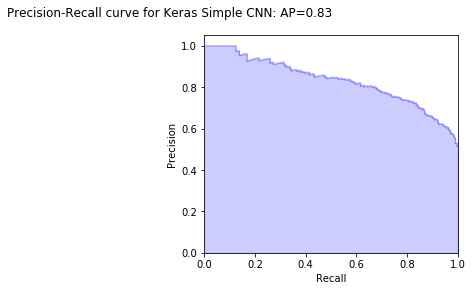

In [125]:

print(plot_precision_recall_curve(first_arg(y_val), first_arg(preds), "Keras Simple CNN"))


In [108]:
print(preds.argmax(axis=1))

[0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0
 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1
 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0
 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1
 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0
 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1
 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0
 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0
 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0
 1 1 0 0 1 0 0 1 0 1 1 1 

### Exercise 4

Explore different network architectures (e.g., stacking 4 Conv2D+MaxPooling2D layers) and various ways in tuning the model parameters to see if you can improve the model performance on the validation set.

In [126]:
# Add your code here

input_shape = x_train[1].shape

model_complex = Sequential()
#add model layers

model_complex.add(Conv2D(128, 2,padding='same', input_shape=input_shape))
model_complex.add(BatchNormalization())
model_complex.add(Activation('relu'))
model_complex.add(MaxPooling2D(pool_size=(2,2)))
model_complex.add(Dropout(0.2))

model_complex.add(Conv2D(256, 2, padding='same'))
model_complex.add(BatchNormalization())
model_complex.add(Activation('relu'))
model_complex.add(MaxPooling2D(pool_size=(2,2)))
model_complex.add(Dropout(0.2))

model_complex.add(Conv2D(512, 2, padding='same'))
model_complex.add(BatchNormalization())
model_complex.add(Activation('relu'))
model_complex.add(MaxPooling2D(pool_size=(2,2)))

model_complex.add(Flatten())

model_complex.add(Dense(1024, activation='relu'))
model_complex.add(BatchNormalization())
model_complex.add(Dropout(0.2))
model_complex.add(Dense(512, activation='relu'))

model_complex.add(Dense(2, activation='sigmoid'))


In [127]:

optimizer = keras.optimizers.RMSprop(lr=0.00005)
model_complex.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [130]:

aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")


In [131]:

# history_complex = model_complex.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_test, y_test), verbose=1)

history_complex = model_complex.fit_generator(aug.flow(x_train, y_train, batch_size=batch_size), validation_data=(x_test, y_test), steps_per_epoch=len(x_train) // batch_size, epochs=epochs)


Epoch 1/60
37/37 [==============================] - 7s 179ms/step - loss: 0.7246 - acc: 0.7230 - val_loss: 0.5499 - val_acc: 0.7700
Epoch 2/60
37/37 [==============================] - 6s 174ms/step - loss: 0.6181 - acc: 0.7234 - val_loss: 0.5409 - val_acc: 0.7467
Epoch 3/60
37/37 [==============================] - 6s 174ms/step - loss: 0.5546 - acc: 0.7363 - val_loss: 0.5638 - val_acc: 0.7467
Epoch 4/60
37/37 [==============================] - 6s 174ms/step - loss: 0.5330 - acc: 0.7394 - val_loss: 0.5432 - val_acc: 0.7450
Epoch 5/60
37/37 [==============================] - 7s 176ms/step - loss: 0.5304 - acc: 0.7432 - val_loss: 0.5292 - val_acc: 0.7550
Epoch 6/60
37/37 [==============================] - 6s 172ms/step - loss: 0.5141 - acc: 0.7496 - val_loss: 0.5367 - val_acc: 0.7583
Epoch 7/60
37/37 [==============================] - 6s 175ms/step - loss: 0.5068 - acc: 0.7585 - val_loss: 0.5047 - val_acc: 0.7717
Epoch 8/60
37/37 [==============================] - 6s 175ms/step - loss: 0.

### Exercise 5

Apply the trained model on the testing set and output the classification results.

In [27]:
# Add your code here

weights_filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(weights_filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode='max')
callbacks_list = [checkpoint]

### Exercise 6 

Plot the saliency map of original image to see which part is important for making classification decisions. You can refer to the following blog article on how to generate visualisation results of the filters in the ConvNets.
https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

In [28]:
# Add your code here